![Los Angeles skyline](la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

## The Tasks
Explore the crimes.csv dataset and use your findings to answer the following questions:
- A. Which hour has the highest frequency of crimes? Store as an integer variable called `peak_crime_hour.`
- B. Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called `peak_night_crime_location.`
- C. Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels `"0-17",` `"18-25",` `"26-34",` `"35-44",` `"45-54",` `"55-64",` and `"65+"` as the index and the frequency of crimes as the values.

In [85]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", parse_dates=["Date Rptd", "DATE OCC"], dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [86]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


In [87]:
crimes.describe()

,DR_NO,Vict Age
count,1.857150e+05,185715.000000
mean,2.255781e+08,39.999257
std,5.017438e+06,15.450227
min,2.009072e+08,2.000000
25%,2.210108e+08,28.000000
50%,2.220114e+08,37.000000
75%,2.310044e+08,50.000000
max,2.399097e+08,99.000000


### Task A
Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.

#### Check time column for weird values and missing values

In [88]:
crimes['TIME OCC'].sort_values()
crimes['TIME OCC'].sort_values().tail()

166061    2359
35116     2359
37755     2359
108179    2359
146282    2359
Name: TIME OCC, dtype: object

In [89]:
crimes['TIME OCC'].isna().sum()

0

In [90]:
crimes['TIME OCC'].unique()

array(['1110', '1620', '1200', ..., '0039', '0431', '0209'], dtype=object)

In [91]:
#crimes['TIME OCC'].head(10)

In [92]:
# create string with first two elements of time string
#crimes['TIME OCC'].str[:2].head(10)

In [93]:
crimes['TIME HOUR'] = crimes['TIME OCC'].str[:2]

In [94]:
crimes['TIME HOUR'].sort_values().unique()

array(['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21',
       '22', '23'], dtype=object)

#### calculate number of crimes per hour

In [95]:
crimes['TIME HOUR'].value_counts()

12    13663
18    10125
17     9964
20     9579
15     9393
19     9262
16     9224
14     8872
11     8787
00     8728
21     8701
22     8531
13     8474
10     8440
08     7523
23     7419
09     7092
01     5836
06     5621
07     5403
02     4726
03     3943
04     3238
05     3171
Name: TIME HOUR, dtype: int64

<AxesSubplot: xlabel='TIME HOUR', ylabel='count'>

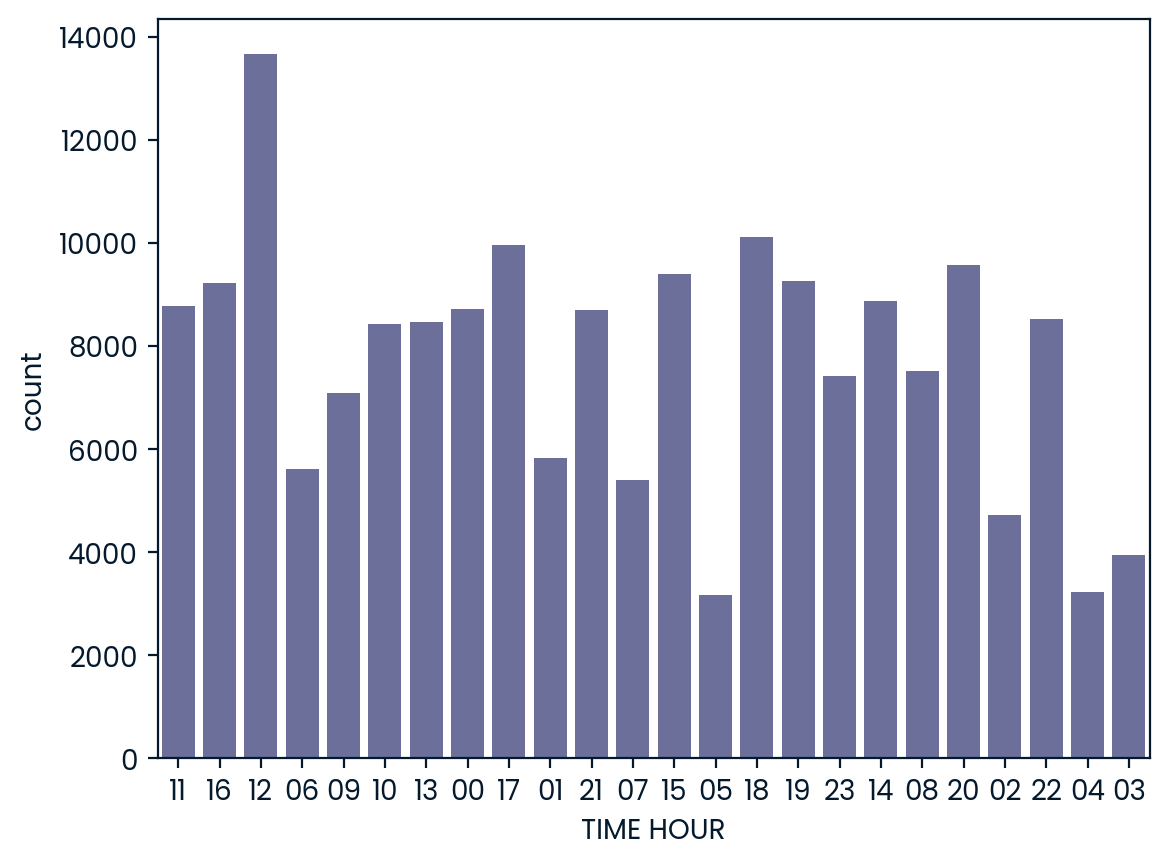

In [96]:
sns.countplot(x="TIME HOUR", data=crimes)

In [97]:
peak_crime_hour = crimes.groupby(['TIME HOUR']).size().sort_values(ascending=False).index[0]

In [98]:
peak_crime_hour = int(peak_crime_hour)

In [99]:
print(type(peak_crime_hour))
print(peak_crime_hour)

<class 'int'>
12


### Task B
Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.

In [100]:
# Subset night crimes from crimes dataframe
night_crimes = crimes[(crimes['TIME HOUR'] >= '22') | (crimes['TIME HOUR'] < '04')].copy()

In [101]:
night_crimes.shape

(39183, 13)

In [102]:
night_crimes['TIME HOUR'].sort_values().unique()

array(['00', '01', '02', '03', '22', '23'], dtype=object)

In [103]:
night_crimes['TIME HOUR'].value_counts()

00    8728
22    8531
23    7419
01    5836
02    4726
03    3943
Name: TIME HOUR, dtype: int64

#### Find area with most night crimes 

In [104]:
night_crimes['AREA NAME'].value_counts()

Central        3312
Hollywood      2699
77th Street    2558
Southwest      2347
Southeast      2218
Newton         2142
Olympic        2137
Pacific        1916
Rampart        1860
N Hollywood    1855
Wilshire       1716
Northeast      1684
Van Nuys       1629
West Valley    1520
Topanga        1461
Mission        1453
Harbor         1384
West LA        1369
Devonshire     1348
Hollenbeck     1315
Foothill       1260
Name: AREA NAME, dtype: int64

In [105]:
peak_night_crime_location = night_crimes['AREA NAME'].value_counts().index[0]

In [106]:
print(type(peak_night_crime_location))
print(peak_night_crime_location)

<class 'str'>
Central


#### Task C
Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

#### Inspect age

In [107]:
crimes['Vict Age'].describe()

count    185715.000000
mean         39.999257
std          15.450227
min           2.000000
25%          28.000000
50%          37.000000
75%          50.000000
max          99.000000
Name: Vict Age, dtype: float64

In [108]:
crimes['Vict Age'].isna().sum()

0

In [109]:
crimes['Vict Age'].head()

0    27
1    60
2    28
3    37
4    79
Name: Vict Age, dtype: int64

#### Create age groups

In [110]:
# Create age groups
crimes['Age groups'] = pd.cut(x=crimes['Vict Age']
       , bins=[0, 17, 25, 34, 44, 54, 64, 100]
       , labels=['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+'])

In [111]:
crimes[['Vict Age', 'Age groups']].head(5)

,Vict Age,Age groups
0,27,26-34
1,60,55-64
2,28,26-34
3,37,35-44
4,79,65+


In [112]:
# test the edge-cases
#for age in [17,18,25,26,34,35,44,45,54,55,64,65,99,100]:
#    display(crimes[crimes['Vict Age'] == age][['Vict Age', 'Age groups']].head(1))

#### Calculate the crime per age group

In [113]:
victim_ages = crimes.groupby('Age groups').size()

In [114]:
victim_ages

Age groups
0-17      4528
18-25    28291
26-34    47470
35-44    42157
45-54    28353
55-64    20169
65+      14747
dtype: int64

In [115]:
type(victim_ages)

pandas.core.series.Series

In [116]:
victim_ages.index

CategoricalIndex(['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+'], categories=['0-17', '18-25', '26-34', '35-44', '45-54', '55-64', '65+'], ordered=True, dtype='category', name='Age groups')

In [117]:
victim_ages.values

array([ 4528, 28291, 47470, 42157, 28353, 20169, 14747])